Included Here: Relevant Resources for first learning how to load in the image data. This was a major challenge for this project, and during the initial weeks of the semester, this challenge was hard to overcome. After experimenting with many libraries, datasets, and methods, I was able to figure out how to load in the data.

https://medium.datadriveninvestor.com/load-in-image-classification-data-e2dfec6dfcb6

https://www.youtube.com/watch?v=BqgTU7_cBnk&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN&index=4



In [1]:
#Essential Libraries needed throughout the notebook

!pip3 install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from venv import create
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
!pip3 install keras.applications.resnet50
from tensorflow.keras.applications.resnet import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np
import keras
import matplotlib.pyplot as plt
from base64 import decode
import random




[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement keras.applications.resnet50 (from versions: none)
ERROR: No matching distribution found for keras.applications.resnet50

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In the code block below are remnants of my original model. I first wanted to create my own model, however, manipulating the images and iterating through them, and then consequently applying the model to test new images was proven to be not a viable solution. I include the code below to show progress throughout the project.

In [2]:
# DATADIR = "/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/train"
# CATEGORIES = ['dogs', 'cats']
# for category in CATEGORIES:
#     path = os.path.join(DATADIR, category) 
# IMG_SIZE = 100


# training_data = []
# def create_training_data():
#     for category in CATEGORIES:
#         path = os.path.join(DATADIR,category)
#         class_num = CATEGORIES.index(category)
#         for image in os.listdir(path):
#             try: 
#                 img_array = cv2.imread(os.path.join(path,image))
#                 new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#                 training_data.append([new_array,class_num])
#             except Exception as e:
#                 print(str(e))
# create_training_data()

# print(len(training_data))

# count_cats = 0
# count_dogs = 0 
# for image in training_data:
#     if image[1] == 0:
#         count_cats += 1
#     else:
#          count_dogs +=1
# print('Cats:', count_cats, 'Dogs:', count_dogs)

# X = []
# y = []
# for features, label in training_data:
#     X.append(features)
#     y.append(label)
# X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# import pickle
# pickle_out = open('X.pickle', 'wb')
# pickle.dump(X, pickle_out)
# pickle_out.close()
# pickle_out = open('y.pickle', 'wb')
# pickle.dump(y, pickle_out)
# pickle_out.close()

# pickle_in = open('X.pickle', 'rb')
# X = pickle.load(pickle_in)


# X = pickle.load(open('X.pickle', 'rb'))
# y = pickle.load(open('y.pickle', 'rb'))
# y = np.array(y)
# X = X/225.0



# model = Sequential()
# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu")) 


# model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu")) 
# model.add(MaxPooling2D(pool_size=(2,2)))
            
# model.add(Flatten())

# model.add(Dense(4))
# model.add(Activation("relu")) 

# model.add(Dense(64))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
# model.compile(loss='binary_crossentropy',
#                                 optimizer="adam",
#                                 metrics=['accuracy'])
# model.fit(X,y, epochs=1, batch_size=64, validation_split=.2)


# W = 5
# H = 5
# fig, ax = plt.subplots(W, H, figsize = (17,17))
# DATADIR="/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/test"
# import random

# ax = ax.ravel() 
# for i in np.arange(0, W * H): 
#     label ='NORMAL'
#     class_dir = os.path.join(DATADIR)
#     image = random.choice(os.listdir(class_dir))
#     img = plt.imread(os.path.join(class_dir,image))
#     ax[i].imshow( img )
#     ax[i].set_title(label, fontsize = 8) 
#     ax[i].axis('off')


After learning that the model above was not a viable solution, I explored new premade models. From here, I found the ResNet50 model, which was a godsend. I have included within this block resurces I have referenced to create a succesful implementation of the model.

https://thedatafrog.com/en/articles/dogs-vs-cats/
model = tf.keras.models.load_model("CATS_DOGS_OCT19.model")


https://stackoverflow.com/questions/49793018/how-to-test-a-trained-model-using-tensorflow-for-image-classification

https://www.kaggle.com/code/drrajkulkarni/cats-dogs-convnet-pytorch

https://www.kaggle.com/code/ahmedtarek26/cats-vs-dogs-cnn-model

In the below block I test the Resnet model. The model is pretrained on millions of images. I will be assessing it on a specific image stored on my computer.


2022-11-30 15:40:20.673244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 1s 1s/step
Predicted: [('n02093428', 'American_Staffordshire_terrier', 0.59133387), ('n02093256', 'Staffordshire_bullterrier', 0.25549716), ('n02110806', 'basenji', 0.07935302)]


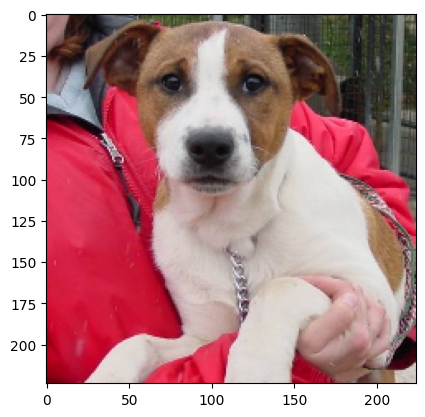

In [3]:


model2 = ResNet50(weights='imagenet')
###model1 = tf.keras.models.load_model("CATS_DOGS_OCT19.model")


def evaluate(img_fname):
    img = keras.utils.load_img(img_fname, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model2.predict(x)
 
    print('Predicted:', decode_predictions(preds, top=3)[0])
    plt.imshow(img)


evaluate('/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/test/21.jpg')


Included in this block are resources I used to learn how to randomly iterate through images, augment images, and convert lists to a string. In the code block below is the culmination of my model monitoring system.

https://www.geeksforgeeks.org/how-to-iterate-through-images-in-a-folder-python/

https://medium.com/analytics-vidhya/data-augmentation-techniques-using-opencv-657bcb9cc30b

manipulation

https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/

1/1 [==============================] - 0s 201ms/step
prediction is weak
1/1 [==============================] - 0s 319ms/step
Prediction is valid
1/1 [==============================] - 0s 265ms/step
prediction is invalid
1/1 [==============================] - 0s 92ms/step
Prediction is valid
1/1 [==============================] - 0s 144ms/step
prediction is weak
1/1 [==============================] - 0s 285ms/step
Prediction is valid
1/1 [==============================] - 0s 160ms/step
Prediction is valid
1/1 [==============================] - 0s 252ms/step
prediction is weak
1/1 [==============================] - 0s 93ms/step
Prediction is valid
1/1 [==============================] - 0s 255ms/step
Prediction is valid
1/1 [==============================] - 0s 90ms/step
Prediction is valid
1/1 [==============================] - 0s 179ms/step
prediction is weak
1/1 [==============================] - 0s 259ms/step
prediction is weak
1/1 [==============================] - 0s 245ms/step
Pred

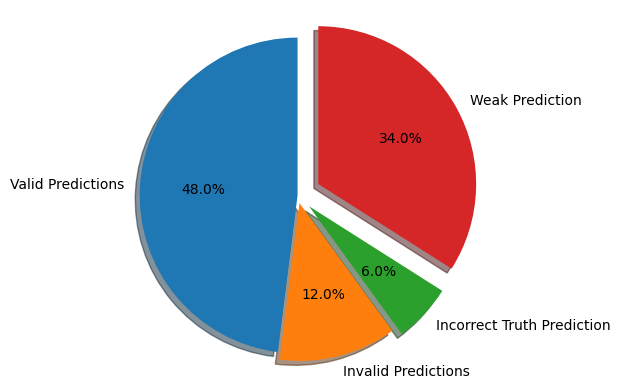

In [4]:

datastorage_valid=[] ##Arrays needed to store the amount of correct, incorrect, and valid predictions
datastorage_invalid=[]
datastorage_pred_wrong=[]
data_storage_weak=[]




length_pool = input('Please enter a size of the pool in which you would like to test between 100-500: ') ##user input for the size of the desired monitoring run
length_pool=int(length_pool)

i=0
while i <length_pool:

    

    def evaluate():

        ### Loading in the image, and defining the random variable to determine which image should be selected
        DATADIR="/Users/glennhubbard/Desktop/Senior/ds440/Cats_Dogs_Torch/test"
        class_dir = os.path.join(DATADIR)
        image = random.choice(os.listdir(class_dir))
        img = plt.imread(os.path.join(class_dir,image))
        
        ###Determining the prediction of the truth image
        z = keras.utils.img_to_array(img)
        z = np.expand_dims(z, axis=0)
        z = preprocess_input(z)
        preds_true = model2.predict(z)

        
        ###First Manipulation--Increasing Brightness
        random_num_1=random.randint(1, 250)
        bright_action=np.ones(img.shape,dtype='uint8')*random_num_1
        bright_img=cv2.add(img,bright_action)
        random_num_2=random.randint(1, 250)
        bright_action=np.ones(img.shape,dtype='uint8')*random_num_2
        bright_img=cv2.subtract(img,bright_action)
        x = keras.utils.img_to_array(bright_img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        preds_1 = model2.predict(x)





        ###Second Manipulation--Decreasing Brightness
        bright_action_=np.ones(img.shape,dtype='uint8')*random_num_2
        bright_img_=cv2.add(img,bright_action_)
        bright_action_=np.ones(img.shape,dtype='uint8')*random_num_1
        bright_img_=cv2.subtract(img,bright_action_)
        y = keras.utils.img_to_array(bright_img_)
        y = np.expand_dims(y, axis=0)
        y = preprocess_input(y)
        preds_2 = model2.predict(y)
        
       
        
 

       
        ###Determines within each manipulated image the final determination--is this a cat or a dog
        a = decode_predictions(preds_1,top=3)
        list1, list2,list3 = zip(*a)
        a_class_1 = (list1[0][0])
        a_class_2 = (list2[0][0])
        a_class_3 = (list3[0][0])


        a = [*a_class_1]
        b = [*a_class_2]
        c = [*a_class_3]
        truth_trigger_brightened=False      

        if a[2]==b[2] or a[2]==c[2]:
            truth_trigger_brightened=True
        


        b = decode_predictions(preds_2,top=3)
        list1, list2,list3 = zip(*b)
        b_class_1 = (list1[0][0])
        b_class_2 = (list2[0][0])
        b_class_3 = (list3[0][0])

        a = [*b_class_1]
        b = [*b_class_2]
        c = [*b_class_3]
        truth_trigger_dulled=False


        if a[2]==b[2] or a[2]==c[2]:
            truth_trigger_dulled=True
        
        
        ### Is the internal prediction within the class correct--Is the dog a dog, is the cat a cat
        ###Assesses if the truth image was predicted correctly
        c = decode_predictions(preds_true,top=3)
        list1, list2,list3 = zip(*c)
        c_class_1 = (list1[0][0])
        c_class_2 = (list2[0][0])
        c_class_3 = (list3[0][0])


        a = [*c_class_1]
        b = [*c_class_2]
        c = [*c_class_3]
        truth_trigger_normal=False      



        ###Determine if the truth prediction is true or false
        ### if false, a new class is added
        if a[2]==b[2] or a[2]==c[2]:
            truth_trigger_normal=True
        else:
            truth_trigger_normal=None
        


        ##Corroborates if the manipulated images are the same as the truth image
        valid=False
        invalid=False
        weak_pred=False
        if truth_trigger_normal==None:
            print("Warning:Truth image prediction is invalid")
        elif truth_trigger_normal==truth_trigger_dulled and truth_trigger_normal==truth_trigger_brightened:
                print("Prediction is valid")
                valid=True
        elif truth_trigger_normal!=truth_trigger_dulled and truth_trigger_normal!=truth_trigger_brightened:
                print("prediction is invalid")
                invalid=True
        else:
            print("prediction is weak")
            weak_pred=True


        if valid==True:
                datastorage_valid.append(1)
        elif invalid==True:
                datastorage_invalid.append(0)
        elif weak_pred==True:
            data_storage_weak.append(2)
        else:
            datastorage_pred_wrong.append(3)
        
          

   
       
    
        

    evaluate()

    i+=1


###Accuracy Calculation
percent=[]
total_len=len(datastorage_valid) +len(datastorage_invalid) + len(datastorage_pred_wrong) +len(data_storage_weak)
percentage_valid= len(datastorage_valid) /total_len
percentage_invalid= len(datastorage_invalid)/total_len
percentage_weak= len(data_storage_weak)/total_len
percentage_wrong= len(datastorage_pred_wrong)/total_len


#Pie graph
labels = 'Valid Predictions', 'Invalid Predictions', 'Incorrect Truth Prediction', 'Weak Prediction'
sizes = [percentage_valid, percentage_invalid, percentage_wrong,percentage_weak]
explode = (0, 0.05,.1,.15)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


###Ability to individually set and determine if the model is effective. This is subjective for the user, but here is an example.
if percentage_valid>=0.7:
    print("This model is highly effective. 70 percent of all images altered are classified correctly")
elif (percentage_valid+percentage_weak) >=0.9:
    print("With the inclusion of weakly classified images, this model is performing at a satisfactory level")
elif percentage_invalid>=.15:
    print("This model misclassifies modified images at a high rate")
elif percentage_wrong>=0.10:
    print('The model is misclassifying even the truth image at a high rate. Please reevaluate the training of the model')
